# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import time
import urllib

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Import API key
from config import weather_api_key
# print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

#Create sample size to limit 
sample_size = 3

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=sample_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=sample_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['elk plain', 'avarua', 'albany']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,elk plain,,US,,,,,,
1,avarua,,CK,,,,,,
2,albany,,AU,,,,,,


In [5]:
#api.openweathermap.org/data/2.5/find?q=London&units=imperial


# Build the endpoint URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="
# print(url)


# Start the call counter 
record = 1
record_set = 1

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = url + row['City']
    print(query_url)
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record == 51:
        record_set += 1
        record = 1
        time.sleep(60)
        
        
#end of for loop ############################

print('''
-----------------------------
Data Retrival Complete
-----------------------------''')
        


-----------------------------
Beginning Data Retrieval
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35e96c7b86b91647c10a7f1ca67c9958&q=elk plain
Processing Weather Data for Record 1 of Set 1 | Elk Plain
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35e96c7b86b91647c10a7f1ca67c9958&q=avarua
Processing Weather Data for Record 2 of Set 1 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35e96c7b86b91647c10a7f1ca67c9958&q=albany
Processing Weather Data for Record 3 of Set 1 | Albany

-----------------------------
Data Retrival Complete
-----------------------------


In [8]:
city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,elk plain,1,US,1620229408,81,47.0532,-122.398,50.0,3.85
1,avarua,75,CK,1620229408,88,-21.2078,-159.775,75.2,9.22
2,albany,100,AU,1620229304,92,42.6001,-73.9662,55.0,0.56


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("output_data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,elk plain,1,US,1620229408,81,47.0532,-122.398,50.0,3.85
1,avarua,75,CK,1620229408,88,-21.2078,-159.775,75.2,9.22
2,albany,100,AU,1620229304,92,42.6001,-73.9662,55.0,0.56


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#query for humidity>100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,elk plain,1,US,1620229408,81,47.0532,-122.398,50.0,3.85
1,avarua,75,CK,1620229408,88,-21.2078,-159.775,75.2,9.22
2,albany,100,AU,1620229304,92,42.6001,-73.9662,55.0,0.56


## Latitude vs. Temperature Plot

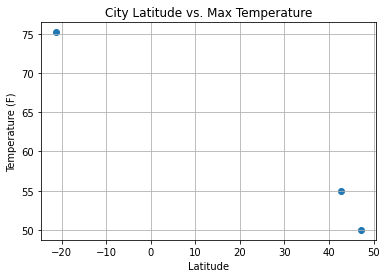

In [20]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

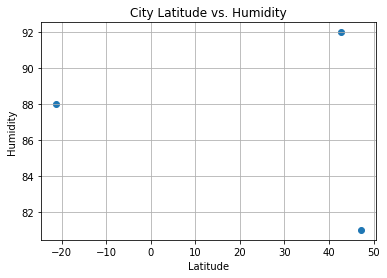

In [21]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

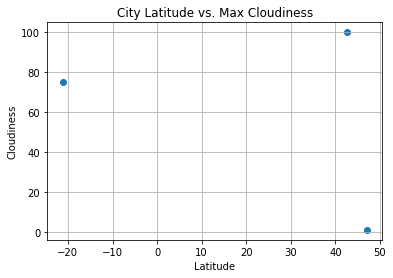

In [22]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

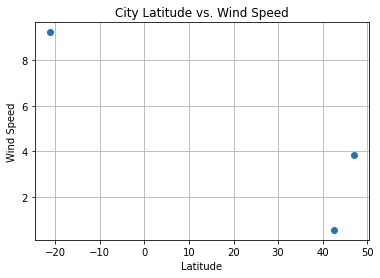

In [23]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression